# <center><font color = "green"><b>Udacity Project 1: Landmines, not Cats &#128049; </b></center>

<center><img src="CRISPDMSmall.png"/></center>

### <center><u><font color = "green"><b> CRISP DM </b></u></center>

<b>The CRISP DM steps will be split up as they are covered in this project:</b>
 - <b>Business Understanding</b> = Project Goals/Stakeholder Needs
 - <b>Data Understanding</b> = Initial Exploratory Analysis
 - <b>Data Preparation</b> = Merge, Clean, Transform Data + Address Issues
 - <b>Modeling</b> = Select Algorithms + Train Models
 - <b>Evaluation</b> = Choose Metrics + Validate Model With Unseen Data
 - <b>Deployment</b> = Implement Model in Real-World Applications + Monitor/Update Process
    - <font color = "red"><b>Note:</b> <font color = "black">Deployment is a future consideration full/loop of CRISP DM, this project wont breach into this

##### 

---

##### 

### <center><u><font color = "green"><b> Business Understanding:</b> <font color = "black">Project Goals/Stakeholder Needs </u></center>

<b>Project Goals:</b>
 - Find an interesting dataset within the Udacity available options and follow the CRISP DM process to fully anlayze it
 - Create a blogpost discussing the results of the analysis
 - Upon choosing the data, there are a few "potential" question paths I find interesting to explore below/within the analysis:
    - Could a Country's representatives consider casualties to increase the more Anti-Vehicle mines are cleared/destroyed?
    - Could a Country's representatives consider casualties to increase the more Non-Anti Vehicle mines are cleared/destroyed?
    - Could a Country's representatives consider that large stockpiles/instances of mines cleared muddy up their datas representation to predict future efforts?
    - Could a Country's representatives consider casualties to increase the smaller the mine area cleared is, tighter working conditions?
    - Data stops at 2012, likely due to an end in program, however it would be interesting to forecast future years
    - Or forecast when a given country would reach "zero" and be fully cleared

#### <b> Data Source Info </b>
<b>Raw Source - World Bank Dataset:</b>
 - https://databank.worldbank.org/source/landmine-contamination-casualties-and-clearance-(lc3d)#
 - Database: landmine-contamination-casualties-and-clearance-(lc3d)
 - Countries: All
 - Datasource: Landmine and Cluster Munitions Monitor
 - Series:
     - Anti-Vehicle Mines Destroyed
     - Casualties, Total
     - Mine Area Cleared (sq.km)
     - Non-Anti Vehicle Mines Destroyed
 - Time (years): 2012, 2011, 2010, 2009
     - 2012 was the most recent year, this will be mentioned later on
     - Also, as I loaded earlier years, they continued to be nulled all the way down for the most part
     - I deemed the earliest years not super relevant for the analysis, and stuck with 4

##### <b>Note:</b>
 - I briefly checked out the data in the CSV before proceeding with the analysis
 - The contents seemed interesting enough as a dataset, but not all the data may be useful in this project
 - There appeared to be trailing footer rows that need to be dropped later on

##### 

---

##### 

### <center><u><font color = "green"><b> Data Understanding:</b> <font color = "black">Initial Exploratory Analysis</u><center>

#### <b>Libraries/Packages </b>

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, accuracy_score, precision_score, recall_score

##### <b>Loading the data:</b>

In [251]:
csv = "Project1Data.csv"

In [252]:
df = pd.read_csv(csv)

In [253]:
df.head(2)

,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012]
0,Landmine and Cluster Munition Monitor,Monitor,Anti-vehicle mines destroyed,LCM.57,Afghanistan,AFG,..,..,1032,..
1,Landmine and Cluster Munition Monitor,Monitor,Anti-vehicle mines destroyed,LCM.57,Albania,ALB,..,..,..,..


In [254]:
# Checking if there are Nulls in the dataset
nan_count = df.isnull().sum()
print(nan_count)

Data Source Name    3
Data Source Code    5
Series Name         5
Series Code         5
Country Name        5
Country Code        5
2009 [YR2009]       5
2010 [YR2010]       5
2011 [YR2011]       5
2012 [YR2012]       5
dtype: int64


In [255]:
# There are in fact Null rows, I will want to remove those later on
filtered_df = df[df['Series Name'].isna()]
print(filtered_df)

                                      Data Source Name Data Source Code  \
848                                                NaN              NaN   
849                                                NaN              NaN   
850                                                NaN              NaN   
851  Data from database: Landmine Contamination Cas...              NaN   
852                           Last Updated: 08/16/2013              NaN   

    Series Name Series Code Country Name Country Code 2009 [YR2009]  \
848         NaN         NaN          NaN          NaN           NaN   
849         NaN         NaN          NaN          NaN           NaN   
850         NaN         NaN          NaN          NaN           NaN   
851         NaN         NaN          NaN          NaN           NaN   
852         NaN         NaN          NaN          NaN           NaN   

    2010 [YR2010] 2011 [YR2011] 2012 [YR2012]  
848           NaN           NaN           NaN  
849           NaN         

In [256]:
filtered_df.dtypes

Data Source Name    object
Data Source Code    object
Series Name         object
Series Code         object
Country Name        object
Country Code        object
2009 [YR2009]       object
2010 [YR2010]       object
2011 [YR2011]       object
2012 [YR2012]       object
dtype: object

#### <font color = "green"><center><b><u>Initial Exploratory Analysis Summary and Notes</b></u>
 - The Years are Columns, I want to unpivot this into a single column with their values, and another column with the actual Year Values
 - I want to remove NaN trailing CSV rows
 - The Series Names are my other Features, I want these to be individual columns, with their Values below, so ill need to pivot them
 - I noticed ".." are placeholders for the lack of data, there may be cells with 0 as well, I consider ".." as Nulls, and will remove them
 - All of the columns are objects, which will likely not be useful, so ill need to convert them to integers/float
 - <b>I want to make some plots to view the Series/Features</b> a bit more visually, however I know I want the data to be pivotted around a bit more, so will finish this off in the next section!! :)

##### 

---

##### 

### <center><u><font color = "green"><b> Data Preparation:</b> <font color = "black">Merge, Clean, Transform Data + Address Issues</u><center>

##### <b>Unpivot/Melt the Year Columns:</b>

In [257]:
# Retrieving column names so I can easily copy and paste them into the melt proces below.
df.columns

Index(['Data Source Name', 'Data Source Code', 'Series Name', 'Series Code',
       'Country Name', 'Country Code', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]'],
      dtype='object')

In [258]:
df_unpivot = df.melt(id_vars=['Data Source Name', 'Data Source Code', 'Series Name', 'Series Code', 'Country Name', 'Country Code'], var_name='YearColumn')#, value_name='Score')

In [259]:
df_unpivot.head(2)

,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,YearColumn,value
0,Landmine and Cluster Munition Monitor,Monitor,Anti-vehicle mines destroyed,LCM.57,Afghanistan,AFG,2009 [YR2009],..
1,Landmine and Cluster Munition Monitor,Monitor,Anti-vehicle mines destroyed,LCM.57,Albania,ALB,2009 [YR2009],..


In [260]:
df_unpivot['Years'] = df_unpivot['YearColumn'].str[:4]

In [261]:
df_unpivot.head(2)

,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,YearColumn,value,Years
0,Landmine and Cluster Munition Monitor,Monitor,Anti-vehicle mines destroyed,LCM.57,Afghanistan,AFG,2009 [YR2009],..,2009
1,Landmine and Cluster Munition Monitor,Monitor,Anti-vehicle mines destroyed,LCM.57,Albania,ALB,2009 [YR2009],..,2009


In [262]:
''' After un-pivoting, this removes rows where there was no data for that series for the given Year '''

df_wo_null = df_unpivot[df_unpivot['value'] != ".."]

In [263]:
# Rows where Value = ".." are now gone, no need to take up space
df_wo_null.head(2)

,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,YearColumn,value,Years
424,Landmine and Cluster Munition Monitor,Monitor,Mine area cleared (sq.km),LCM.43,Afghanistan,AFG,2009 [YR2009],51.5,2009
425,Landmine and Cluster Munition Monitor,Monitor,Mine area cleared (sq.km),LCM.43,Albania,ALB,2009 [YR2009],0.1,2009


######

##### <b>Check and Remove Trailing CSV Footer Rows:</b>

In [264]:
''' Checking if there are in fact trailing footer rows '''
df_wo_null.tail(10)

,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,YearColumn,value,Years
3130,Landmine and Cluster Munition Monitor,Monitor,Mine area cleared (sq.km),LCM.43,Peru,PER,2012 [YR2012],0.010817,2012
3178,Landmine and Cluster Munition Monitor,Monitor,Mine area cleared (sq.km),LCM.43,Uganda,UGA,2012 [YR2012],0.103955,2012
3198,Landmine and Cluster Munition Monitor,Monitor,Non Anti-vehicle mines destroyed,LCM.58,Andorra,AND,2012 [YR2012],0,2012
3343,Landmine and Cluster Munition Monitor,Monitor,Non Anti-vehicle mines destroyed,LCM.58,Philippines,PHL,2012 [YR2012],334,2012
3391,Landmine and Cluster Munition Monitor,Monitor,Non Anti-vehicle mines destroyed,LCM.58,Ukraine,UKR,2012 [YR2012],6720,2012
3407,NaN,NaN,NaN,NaN,NaN,NaN,2012 [YR2012],NaN,2012
3408,NaN,NaN,NaN,NaN,NaN,NaN,2012 [YR2012],NaN,2012
3409,NaN,NaN,NaN,NaN,NaN,NaN,2012 [YR2012],NaN,2012
3410,Data from database: Landmine Contamination Cas...,NaN,NaN,NaN,NaN,NaN,2012 [YR2012],NaN,2012
3411,Last Updated: 08/16/2013,NaN,NaN,NaN,NaN,NaN,2012 [YR2012],NaN,2012


##### <b>Note:</b>
 - I want to make sure after the pivot that any NaN are that should be removed are out of the data
 - Before continuing to pivot the Series into their own columns

In [265]:
''' There are 5 trailing rows, checking as I suspect the melt function may have duplicated some '''
nan_count = df_wo_null.isnull().sum()
print(nan_count)

Data Source Name    12
Data Source Code    20
Series Name         20
Series Code         20
Country Name        20
Country Code        20
YearColumn           0
value               20
Years                0
dtype: int64


In [266]:
''' The above shows more counts than Data Understanding section presented, filtering for them to verify '''

filtered_df = df_wo_null[df_wo_null['Series Name'].isna()]
filtered_df.head(20)

,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,YearColumn,value,Years
848,NaN,NaN,NaN,NaN,NaN,NaN,2009 [YR2009],NaN,2009
849,NaN,NaN,NaN,NaN,NaN,NaN,2009 [YR2009],NaN,2009
850,NaN,NaN,NaN,NaN,NaN,NaN,2009 [YR2009],NaN,2009
851,Data from database: Landmine Contamination Cas...,NaN,NaN,NaN,NaN,NaN,2009 [YR2009],NaN,2009
852,Last Updated: 08/16/2013,NaN,NaN,NaN,NaN,NaN,2009 [YR2009],NaN,2009
1701,NaN,NaN,NaN,NaN,NaN,NaN,2010 [YR2010],NaN,2010
1702,NaN,NaN,NaN,NaN,NaN,NaN,2010 [YR2010],NaN,2010
1703,NaN,NaN,NaN,NaN,NaN,NaN,2010 [YR2010],NaN,2010
1704,Data from database: Landmine Contamination Cas...,NaN,NaN,NaN,NaN,NaN,2010 [YR2010],NaN,2010
1705,Last Updated: 08/16/2013,NaN,NaN,NaN,NaN,NaN,2010 [YR2010],NaN,2010


In [267]:
''' All the NaN are from duplicated trailing rows, I feel comfortable dropping all NaN now from the DataFrame '''

df_wo_null.dropna(inplace = True)
df_wo_null.tail(2)

C:\Users\esplms3\AppData\Local\Temp\1\ipykernel_25704\25670534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_null.dropna(inplace = True)


,Data Source Name,Data Source Code,Series Name,Series Code,Country Name,Country Code,YearColumn,value,Years
3343,Landmine and Cluster Munition Monitor,Monitor,Non Anti-vehicle mines destroyed,LCM.58,Philippines,PHL,2012 [YR2012],334,2012
3391,Landmine and Cluster Munition Monitor,Monitor,Non Anti-vehicle mines destroyed,LCM.58,Ukraine,UKR,2012 [YR2012],6720,2012


In [268]:
# Double-check all the NaN are removed in the current DataFrame design
nan_count = df_wo_null.isnull().sum()
print(nan_count)

Data Source Name    0
Data Source Code    0
Series Name         0
Series Code         0
Country Name        0
Country Code        0
YearColumn          0
value               0
Years               0
dtype: int64


##### <b>Note:</b>
 - Proceeding to pivot the Series into their own columns to use as Features with the rest of the analysis for Project #1

######

##### <b>Pivot the Series Column:</b>

In [269]:
# Drop columns no longer needed before using them as part of the index in the pivot
data_df = df_wo_null.drop(columns=['YearColumn', 'Series Code', 'Data Source Code', 'Data Source Name'])
data_df = data_df.rename(columns={"value": "Values"})
data_df.head(2)

,Series Name,Country Name,Country Code,Values,Years
424,Mine area cleared (sq.km),Afghanistan,AFG,51.5,2009
425,Mine area cleared (sq.km),Albania,ALB,0.1,2009


In [270]:
# Returning column names for easy copy paste
data_df.columns

Index(['Series Name', 'Country Name', 'Country Code', 'Values', 'Years'], dtype='object')

In [271]:
data_df = data_df.pivot(index=['Country Name', 'Country Code', 'Years'], columns='Series Name', values='Values')
data_df.head(5)

Series Name                     Anti-vehicle mines destroyed  \
Country Name Country Code Years                                
Afghanistan  AFG          2009                           NaN   
                          2010                           NaN   
                          2011                          1032   
Albania      ALB          2009                           NaN   
                          2010                           NaN   

Series Name                     Casualties, Total Mine area cleared (sq.km)  \
Country Name Country Code Years                                               
Afghanistan  AFG          2009                NaN                      51.5   
                          2010                NaN                     64.76   
                          2011                812                     68.04   
Albania      ALB          2009                NaN                       0.1   
                          2010                  1                       NaN   

Series Name                     Non Anti-vehicle mines destroyed  
Country Name Country Code Years                                   
Afghanistan  AFG          2009                               NaN  
                          2010                               NaN  
                          2011                             23570  
Albania      ALB          2009                               NaN  
                          2010                               NaN

In [272]:
# These NaN are for valid Series and Years, so I wll fill NaN with 0 to be more visually useful to work with
data_df = data_df.fillna(0)
data_df.head(5)

Series Name                     Anti-vehicle mines destroyed  \
Country Name Country Code Years                                
Afghanistan  AFG          2009                             0   
                          2010                             0   
                          2011                          1032   
Albania      ALB          2009                             0   
                          2010                             0   

Series Name                     Casualties, Total Mine area cleared (sq.km)  \
Country Name Country Code Years                                               
Afghanistan  AFG          2009                  0                      51.5   
                          2010                  0                     64.76   
                          2011                812                     68.04   
Albania      ALB          2009                  0                       0.1   
                          2010                  1                         0   

Series Name                     Non Anti-vehicle mines destroyed  
Country Name Country Code Years                                   
Afghanistan  AFG          2009                                 0  
                          2010                                 0  
                          2011                             23570  
Albania      ALB          2009                                 0  
                          2010                                 0

In [273]:
# Ran into an issue getting to the plotting in the next section, will convert these types from Object to Integer
data_df.dtypes

Series Name
Anti-vehicle mines destroyed        object
Casualties, Total                   object
Mine area cleared (sq.km)           object
Non Anti-vehicle mines destroyed    object
dtype: object

In [274]:
# Converting my Features from Objects to Integers
data_df['Anti-vehicle mines destroyed'] = data_df['Anti-vehicle mines destroyed'].astype('str').astype('Int64')
data_df['Casualties, Total'] = data_df['Casualties, Total'].astype('str').astype('Int64')
data_df['Mine area cleared (sq.km)'] = data_df['Mine area cleared (sq.km)'].astype('str').astype(float)
data_df['Non Anti-vehicle mines destroyed'] = data_df['Non Anti-vehicle mines destroyed'].astype('str').astype('Int64')

In [275]:
# Checking dtypes once more
data_df.dtypes

Series Name
Anti-vehicle mines destroyed          Int64
Casualties, Total                     Int64
Mine area cleared (sq.km)           float64
Non Anti-vehicle mines destroyed      Int64
dtype: object

In [276]:
data_df.head(5)

Series Name                      Anti-vehicle mines destroyed  \
Country Name Country Code Years                                 
Afghanistan  AFG          2009                              0   
                          2010                              0   
                          2011                           1032   
Albania      ALB          2009                              0   
                          2010                              0   

Series Name                      Casualties, Total  Mine area cleared (sq.km)  \
Country Name Country Code Years                                                 
Afghanistan  AFG          2009                   0                      51.50   
                          2010                   0                      64.76   
                          2011                 812                      68.04   
Albania      ALB          2009                   0                       0.10   
                          2010                   1                       0.00   

Series Name                      Non Anti-vehicle mines destroyed  
Country Name Country Code Years                                    
Afghanistan  AFG          2009                                  0  
                          2010                                  0  
                          2011                              23570  
Albania      ALB          2009                                  0  
                          2010                                  0

##### 

---

##### 

### <center><u><font color = "green"><b> Data Understanding:</b> <font color = "black">Initial Exploratory Analysis - CONTINUED!</u><center>

In [277]:
data_df.describe()

Series Name,Anti-vehicle mines destroyed,"Casualties, Total",Mine area cleared (sq.km),Non Anti-vehicle mines destroyed
count,153.0,153.0,153.000000,153.0
mean,252.0,383.751634,14.668965,2550.607843
std,1336.603664,4217.415702,85.965471,12669.33922
min,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.000000,0.0
50%,0.0,2.0,0.030000,0.0
75%,0.0,26.0,1.750000,29.0
max,11906.0,52190.0,762.900000,138498.0


In [278]:
data_df.skew()

Series Name
Anti-vehicle mines destroyed         7.146787
Casualties, Total                   12.355373
Mine area cleared (sq.km)            7.663776
Non Anti-vehicle mines destroyed     8.717283
dtype: Float64

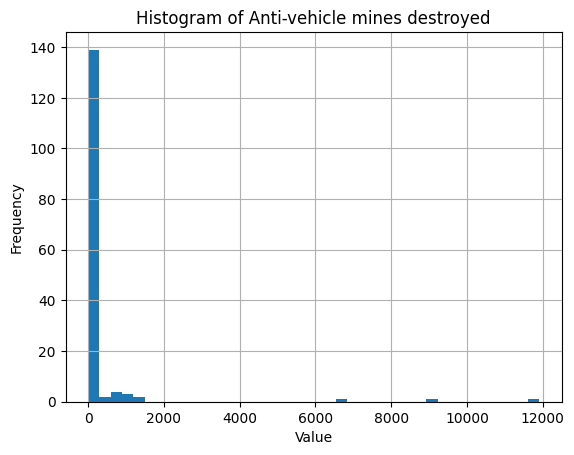

In [279]:
# Mines destroyed have quite a few huge outliers
data_df['Anti-vehicle mines destroyed'].hist(bins=40)
plt.title('Histogram of Anti-vehicle mines destroyed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

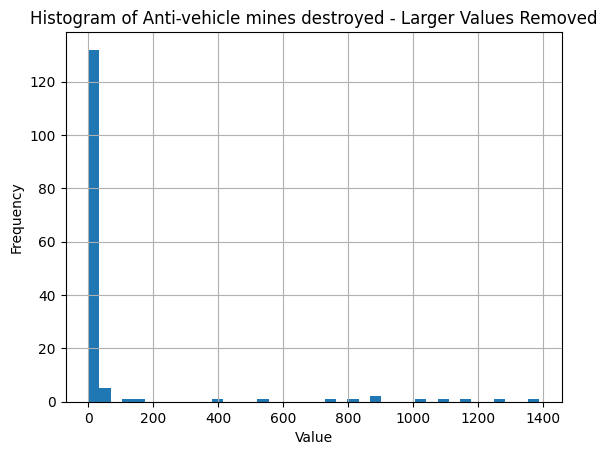

In [280]:
# Mines destroyed have quite a few huge outliers
mines_outlier_check = data_df[data_df['Anti-vehicle mines destroyed'] < 2000] 
# seeing if the distribution improves with larger values removed
mines_outlier_check['Anti-vehicle mines destroyed'].hist(bins=40)
plt.title('Histogram of Anti-vehicle mines destroyed - Larger Values Removed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

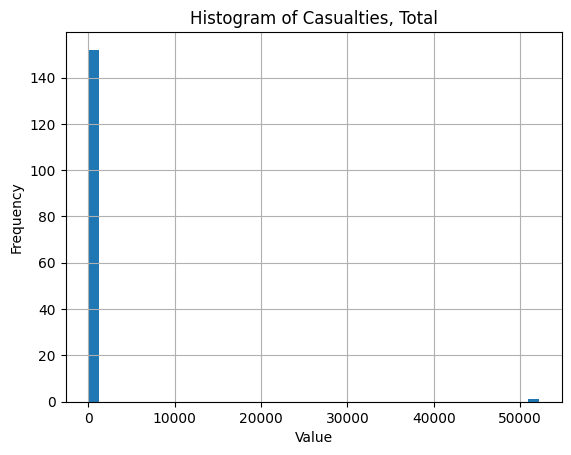

In [281]:
# Casualties have an interesting high outlier
data_df['Casualties, Total'].hist(bins=40)
plt.title('Histogram of Casualties, Total')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

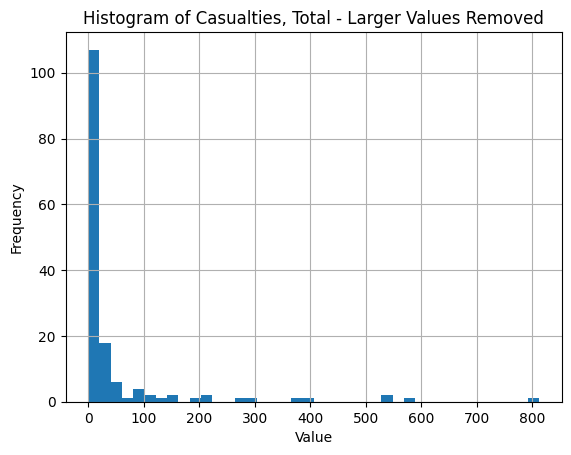

In [282]:
cas_outlier_check = data_df[data_df['Casualties, Total'] < 10000] 
# seeing if the distribution improves with larger values removed
cas_outlier_check['Casualties, Total'].hist(bins=40)
plt.title('Histogram of Casualties, Total - Larger Values Removed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

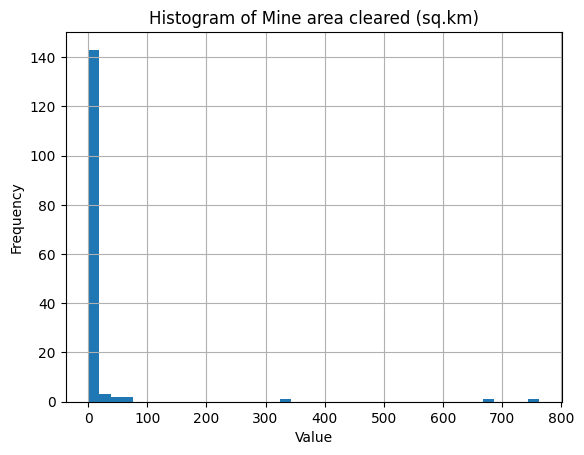

In [283]:
data_df['Mine area cleared (sq.km)'].hist(bins=40)
plt.title('Histogram of Mine area cleared (sq.km)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

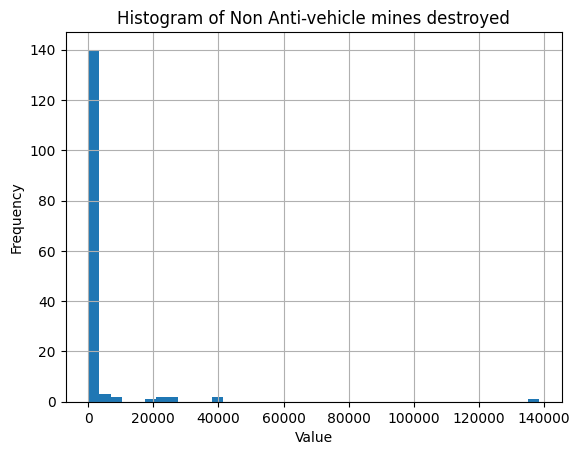

In [284]:
data_df['Non Anti-vehicle mines destroyed'].hist(bins=40)
plt.title('Histogram of Non Anti-vehicle mines destroyed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [285]:
''' I will move forward with my analysis so far without removing self-identified outliers in any of the Features '''
# Researching removal, it states if I have confirmed information on data entry errors, measurement issues, etc.
# I can always create new dataframes on the filtered records if I want to investigate further

' I will move forward with my analysis so far without removing self-identified outliers in any of the Features '

##### 

---

##### 

### <center><u><font color = "green"><b> Modeling:</b> <font color = "black">Select Algorithms + Train Models <font color = "red">Anti-vehicle mines destroyed </u><center>

In [286]:
# Base checking before instantiation
data_df.isna().sum()

Series Name
Anti-vehicle mines destroyed        0
Casualties, Total                   0
Mine area cleared (sq.km)           0
Non Anti-vehicle mines destroyed    0
dtype: int64

In [287]:
# No NaN present, there are Zeros in the dataset, but nulls are gone

In [288]:
data_df.columns

Index(['Anti-vehicle mines destroyed', 'Casualties, Total',
       'Mine area cleared (sq.km)', 'Non Anti-vehicle mines destroyed'],
      dtype='object', name='Series Name')

In [289]:
# Setting Target (y) and Features (X)
y = data_df['Casualties, Total']
X = data_df.drop('Casualties, Total', axis=1)

In [290]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [291]:
# Checking sizes
X_train.shape, X_test.shape

((114, 3), (39, 3))

In [292]:
# I dont have a ton of features, and I really want to check one against Casualties
# Testing a Simple Linear Regression
X_single_train = X_train[['Anti-vehicle mines destroyed']]

In [293]:
# Instantiate and training a simple linear regression algorithm
slr = LinearRegression()
slr.fit(X_single_train, y_train)

LinearRegression()

##### <b>Modeling Notes:</b>
 - Training a Single Linear Regression model off one of my 1st interests/thoughts when I saw this data
    - If more mines are cleared/destroyed, do casualties increase?
 - My depedent variable y, is my target, will be Casualties
 - My Features are any other variables that casualties could depend on, I am choosing Anti-vehicle mines destroyed, as they sounded more dangerous than non-anti mines, so may be tied to casualties

##### 

---

##### 

### <center><u><font color = "green"><b> Evaluation:</b> <font color = "black">Choose Metrics + Validate Model <font color = "red">Anti-vehicle mines destroyed </u><center>

In [294]:
# Predict and Score the Single Linear Regression Model
X_single_test = X_test[['Anti-vehicle mines destroyed']]
slr_predictions = slr.predict(X_single_test)
slr_r2 = slr.score(X_single_test, y_test)
slr_rmse = root_mean_squared_error(y_test, slr_predictions)
print(f'The r^2 is {slr_r2} and the RMSE is {slr_rmse}')


The r^2 is -0.028929564831027932 and the RMSE is 8355.19425674


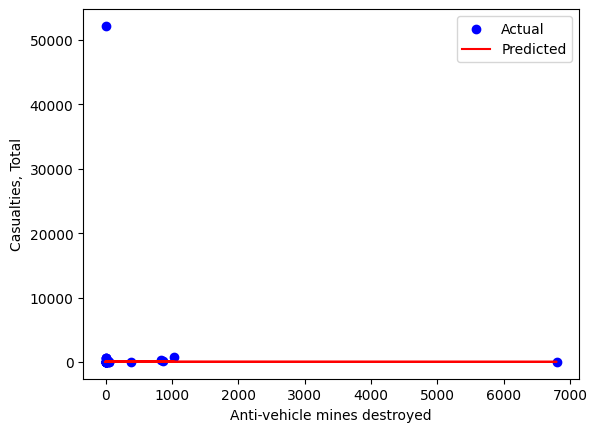

In [295]:
plt.scatter(X_single_test, y_test, color = 'blue', label = 'Actual')
plt.plot(X_single_test, slr_predictions, color = 'red', label = 'Predicted')
plt.xlabel('Anti-vehicle mines destroyed')
plt.ylabel('Casualties, Total')
plt.legend()
plt.show()

##### 

---

##### 

### <center><u><font color = "green"><b> Modeling:</b> <font color = "black">Remove Outliers <font color = "red">Anti-vehicle mines destroyed </u><center>

In [296]:
''' Modeling and Evaluation Again with Outliers Removed '''
data_wo_outliers = data_df[data_df['Anti-vehicle mines destroyed'] < 10]

In [297]:
# Setting Target (y) and Features (X)
y = data_wo_outliers['Casualties, Total']
X = data_wo_outliers.drop('Casualties, Total', axis=1)

In [298]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [299]:
# Checking sizes
X_train.shape, X_test.shape

((98, 3), (33, 3))

In [300]:
X_single_train = X_train[['Anti-vehicle mines destroyed']]

In [301]:
# Instantiate and training a simple linear regression algorithm
slr = LinearRegression()
slr.fit(X_single_train, y_train)

LinearRegression()

##### 

---

##### 

### <center><u><font color = "green"><b> Evaluation:</b> <font color = "black">Remove Outliers <font color = "red">Anti-vehicle mines destroyed </u><center>

In [302]:
# Predict and Score the Single Linear Regression Model
X_single_test = X_test[['Anti-vehicle mines destroyed']]
slr_predictions = slr.predict(X_single_test)
slr_r2 = slr.score(X_single_test, y_test)
slr_rmse = root_mean_squared_error(y_test, slr_predictions)
print(f'The r^2 is {slr_r2} and the RMSE is {slr_rmse}')


The r^2 is -19.544953941120855 and the RMSE is 536.8327912028864


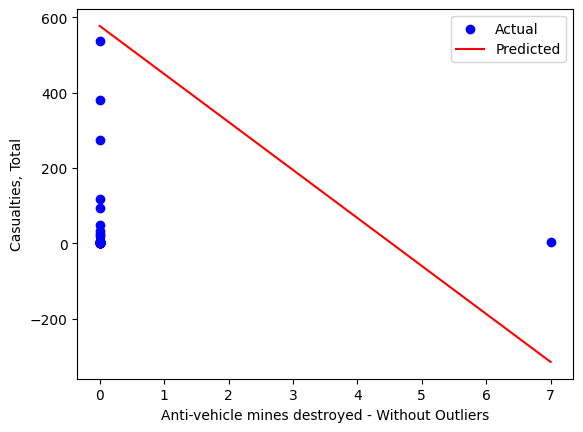

In [303]:
plt.scatter(X_single_test, y_test, color = 'blue', label = 'Actual')
plt.plot(X_single_test, slr_predictions, color = 'red', label = 'Predicted')
plt.xlabel('Anti-vehicle mines destroyed - Without Outliers')
plt.ylabel('Casualties, Total')
plt.legend()
plt.show()

### <font color = "red"><b>Anti-vehicle mines destroyed</b>
### <font color = "green"><b>Question #1: <font color = "black">Could a Country's representatives consider civilian/government casualties to increase the more Anti-Vehicle mines are cleared/destroyed?</b>

### <font color = "green"><b>Assessment #1:</b>
 - <b>Summary:</b> Current analysis/model did not perform better than a general guess, r^2 being negative, it was worse than a guess
 - In my attempt to remove outliers, < 2000 mines destroyed, < 100, < 10, the model r^2 is at least between 0 and abs(1)
 - However, as expected the dataset chosen may not have appropriate characteristics to be evaluated in this way
 - r^2 is negative in all cases, which indicates its performing worse than just an average guess
 - The RMSE initially was ~500 casualties of error for each mine destroyed, and filtering for < 10 mines per Year per Country, increased this to ~9000, not great, and no longer a realistic dataset
 - Accuracy, recall, precision are Classification Model scoring metrics, they will not be discussed.

##### 

---

##### 

### <center><u><font color = "green"><b> Modeling:</b> <font color = "black">Select Algorithms + Train Models <font color = "red">Non Anti-vehicle mines destroyed </u><center>

In [304]:
# Setting Target (y) and Features (X)
y = data_df['Casualties, Total']
X = data_df.drop('Casualties, Total', axis=1)

In [305]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [306]:
# Checking sizes
X_train.shape, X_test.shape

((114, 3), (39, 3))

In [307]:
X_single_train = X_train[['Non Anti-vehicle mines destroyed']]

In [308]:
# Instantiate and training a simple linear regression algorithm
slr = LinearRegression()
slr.fit(X_single_train, y_train)

LinearRegression()

##### 

---

##### 

### <center><u><font color = "green"><b> Evaluation:</b> <font color = "black">Choose Metrics + Validate Model <font color = "red">Non Anti-vehicle mines destroyed </u><center>

In [309]:
# Predict and Score the Single Linear Regression Model
X_single_test = X_test[['Non Anti-vehicle mines destroyed']]
slr_predictions = slr.predict(X_single_test)
slr_r2 = slr.score(X_single_test, y_test)
slr_rmse = root_mean_squared_error(y_test, slr_predictions)
print(f'The r^2 is {slr_r2} and the RMSE is {slr_rmse}')


The r^2 is -17.86244006021192 and the RMSE is 507.180068211154


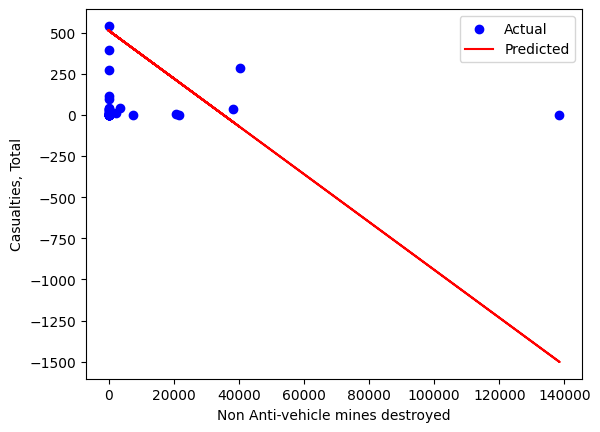

In [310]:
plt.scatter(X_single_test, y_test, color = 'blue', label = 'Actual')
plt.plot(X_single_test, slr_predictions, color = 'red', label = 'Predicted')
plt.xlabel('Non Anti-vehicle mines destroyed')
plt.ylabel('Casualties, Total')
plt.legend()
plt.show()

In [311]:
# Scoring is still bad for this Feature as well, as it is now. Will try removing outliers too.

##### 

---

##### 

### <center><u><font color = "green"><b> Modeling:</b> <font color = "black">Remove Outliers <font color = "red">Non Anti-vehicle mines destroyed </u><center>

In [312]:
''' Modeling and Evaluation Again with Outliers Removed '''
data_wo_outliers = data_df[data_df['Non Anti-vehicle mines destroyed'] < 20000]

In [313]:
# Setting Target (y) and Features (X)
y = data_wo_outliers['Casualties, Total']
X = data_wo_outliers.drop('Casualties, Total', axis=1)

In [314]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [315]:
# Checking sizes
X_train.shape, X_test.shape

((108, 3), (37, 3))

In [316]:
X_single_train = X_train[['Non Anti-vehicle mines destroyed']]

In [317]:
# Instantiate and training a simple linear regression algorithm
slr = LinearRegression()
slr.fit(X_single_train, y_train)

LinearRegression()

##### 

---

##### 

### <center><u><font color = "green"><b> Evaluation:</b> <font color = "black">Remove Outliers <font color = "red">Non Anti-vehicle mines destroyed </u><center>

In [318]:
# Predict and Score the Single Linear Regression Model
X_single_test = X_test[['Non Anti-vehicle mines destroyed']]
slr_predictions = slr.predict(X_single_test)
slr_r2 = slr.score(X_single_test, y_test)
slr_rmse = root_mean_squared_error(y_test, slr_predictions)
print(f'The r^2 is {slr_r2} and the RMSE is {slr_rmse}')


The r^2 is -0.026734578537482623 and the RMSE is 8573.040460928776


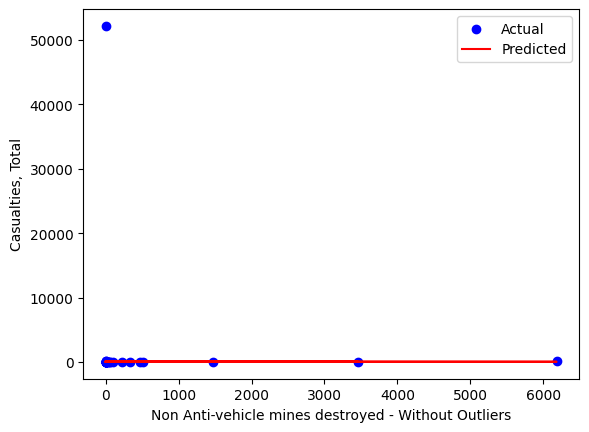

In [319]:
plt.scatter(X_single_test, y_test, color = 'blue', label = 'Actual')
plt.plot(X_single_test, slr_predictions, color = 'red', label = 'Predicted')
plt.xlabel('Non Anti-vehicle mines destroyed - Without Outliers')
plt.ylabel('Casualties, Total')
plt.legend()
plt.show()

### <font color = "red"><b>Non Anti-vehicle mines destroyed = New Scenario</b>
### <font color = "green"><b>Question #2: <font color = "black">Could a Country's representatives consider civilian/government casualties to increase the more Non-Anti Vehicle mines are cleared/destroyed?</b>

### <font color = "green"><b>Assessment #2:</b>
 - <b>Summary:</b> Same as Non Anti-Vehicle mines, r^2 being negative, it was worse than a general guess
 - In my attempt to remove outliers, < 60000 mines destroyed, < 20000, the model r^2 is at least between 0 and abs(1)
 - However, as expected the dataset chosen may not have appropriate characteristics to be evaluated in this way
 - r^2 is negative in all cases, which indicates its performing worse than just an average guess
 - The RMSE initially went from ~500 to ~8500, and filtering for < 20000 mines per Year per Country, is not great, and no longer a realistic dataset
 - Accuracy, recall, precision are Classification Model scoring metrics, they will not be discussed.

### <font color = "green"><b>Question #3: <font color = "black">This data halted capture in 2012, could a Country's representatives consider large/stockpile of either mine type destroyed to be abnormal scenarios, if they are considering to bring back this program, they could filter out these occurrences to better predict and decrease Total Casualties?</b>

### <font color = "green"><b>Assessment #3:</b>
 - <b>Summary:</b> RMSE values increases to very unhealthy levels of variance, R^2 get closer to 0, which isnt a win either

<b>Model/Analysis Results:</b>
 - <b>Data as is:</b>
    - <b>Anti-Vehicle vs Casualties:</b> The r^2 is -17.021696353277946 and the RMSE is 478.2491966542283
    - <b>Non Anti-Vehicle vs Casualties:</b> The r^2 is -13.174701586504204 and the RMSE is 597.7555073912594
 - <b>Without Outliers:</b>
    - <b>Anti-Vehicle vs Casualties:</b> The r^2 is -0.03128768000504012 and the RMSE is 9079.321924948332
    - <b>Non Anti-Vehicle vs Casualties:</b> The r^2 is -0.028207649361975617 and the RMSE is 8575.000295550626

<i><b><font color = "red">Note:</b> <font color = "black">the above numbers may change slightly each time the cells are produced.</i>

# <center><font color = "green"><b>Udacity Project 1 Code End: Apologies for the lack of data on Cats! &#128049; </b></center>